In [59]:
import numpy as np
import scipy.sparse as sp
import os
import scipy.io
import tensorflow as tf

In [60]:
import gnn.GNN as GNN
import gnn.gnn_utils as gnn_utils
import examples.Net_Subgraph as n
import gnn.load as ld
import networkx as nx

In [61]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Example

In [62]:
E_tot = [[0, 1, 0],
         [0, 2, 0],
         [0, 4, 0],
         [1, 0, 0],
         [1, 2, 0],
         [1, 3, 0],
         [2, 0, 0],
         [2, 1, 0],
         [2, 3, 0],
         [2, 4, 0],
         [3, 1, 0],
         [3, 2, 0],
         [4, 0, 0],
         [4, 2, 0],
         [5, 7, 1],
         [5, 8, 1],
         [6, 7, 1],
         [6, 8, 1],
         [7, 5, 1],
         [7, 6, 1],
         [7, 8, 1],
         [8, 5, 1],
         [8, 6, 1],
         [8, 7, 1]]
N_tot = [[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]]

In [63]:
E_tot=np.array(E_tot)
N_tot=np.array(N_tot)

In [64]:
inp, arcnode, graphnode = gnn_utils.from_EN_to_GNN(E_tot, N_tot)

# random labels
labels = np.random.randint(2, size=(N_tot.shape[0]))
labels = np.eye(max(labels)+1, dtype=np.int32)[labels]  # one-hot encoding of labels

In [66]:
E_tot.shape

(24, 3)

In [65]:
arcnode

SparseMatrix(indices=array([[ 0,  0],
       [ 0,  1],
       [ 0,  2],
       [ 1,  3],
       [ 1,  4],
       [ 1,  5],
       [ 2,  6],
       [ 2,  7],
       [ 2,  8],
       [ 2,  9],
       [ 3, 10],
       [ 3, 11],
       [ 4, 12],
       [ 4, 13],
       [ 5, 14],
       [ 5, 15],
       [ 6, 16],
       [ 6, 17],
       [ 7, 18],
       [ 7, 19],
       [ 7, 20],
       [ 8, 21],
       [ 8, 22],
       [ 8, 23]]), values=array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1.], dtype=float32), dense_shape=[9, 24])

In [7]:
threshold = 0.01
learning_rate = 0.01
state_dim = 5
input_dim = inp.shape[1]
output_dim = labels.shape[1]
max_it = 50
num_epoch = 10000

In [8]:
# Create the state transition function, output function, loss function and  metrics
net = n.Net(input_dim, state_dim, output_dim)

# Create the graph neural network model
g = GNN.GNN(net, input_dim, output_dim, state_dim)





Instructions for updating:
Use keras.layers.Dense instead.
Instructions for updating:
Please use `layer.__call__` method instead.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



/home/liz0f/app/anaconda3/envs/tf1_15/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


### Graph

In [4]:
mat_dir="./Data"
mat_fn="sub_15_7_200"
mat=ld.loadmat(os.path.join(mat_dir,mat_fn))
train=mat['dataSet']["trainSet"]
target=np.array(train['targets'])

In [58]:
train['connMatrix']

<3000x3000 sparse matrix of type '<class 'numpy.float64'>'
	with 9062 stored elements in Compressed Sparse Column format>

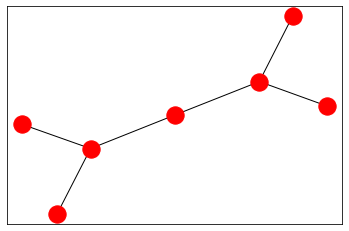

In [20]:
graph=nx.from_scipy_sparse_matrix(train['connMatrix'])
component_no=4
component_size=15
node_list=range(component_no*component_size,(component_no+1)*component_size)
G=nx.subgraph(graph,node_list)
target_G=target[node_list]
pos_nodes=(target_G==1).nonzero()[0]+component_no*component_size
G_sub=nx.subgraph(G,pos_nodes)
pos=nx.spring_layout(G_sub)
nx.draw_networkx_nodes(G_sub,pos,nodelist=pos_nodes,node_color='red')
nx.draw_networkx_edges(G_sub,pos,nodelist=pos_nodes)

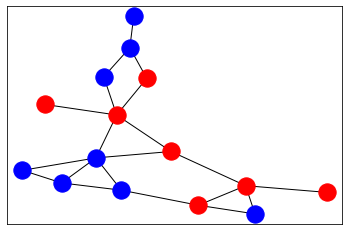

In [17]:
graph=nx.from_scipy_sparse_matrix(train['connMatrix'])
component_no=10
component_size=15
node_list=range(component_no*component_size,(component_no+1)*component_size)
G=nx.subgraph(graph,node_list)
target_G=target[node_list]
pos=nx.spring_layout(G)
pos_nodes=(target_G==1).nonzero()[0]+component_no*component_size
neg_nodes=(target_G==-1).nonzero()[0]+component_no*component_size
nx.draw_networkx_nodes(G,pos,nodelist=pos_nodes,node_color='red')
nx.draw_networkx_nodes(G,pos,nodelist=neg_nodes,node_color='blue')
nx.draw_networkx_edges(G,pos)

### tf.sparse

In [5]:
st=tf.sparse.SparseTensor(indices=[[0, 0], [1, 2]], values=[1, 2], dense_shape=[3, 4])

In [4]:
gpu_options = tf.GPUOptions(allow_growth=True)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

In [10]:
stv=sess.run(st)

In [19]:
st.op

<tf.Operation 'SparseTensor_1/values' type=Const>

### tf.while_loop

In [22]:
i = tf.constant(0)
c = lambda i: tf.less(i, 10)
b = lambda i: tf.add(i, 1)
r = tf.while_loop(c, b, [i])
sess.run(r)

10

In [26]:
import collections
Pair = collections.namedtuple('Pair', 'j, k')
ijk_0 = [tf.constant(0), Pair(tf.constant(1), tf.constant(2))]
c = lambda i, p: i < 10
b = lambda i, p: [i + 1, Pair((p.j + p.k), (p.j - p.k))]
ijk_final = tf.while_loop(c, b, ijk_0)
sess.run(ijk_final)

[10, Pair(j=32, k=64)]

In [27]:
i0 = tf.constant(0)
m0 = tf.ones([2, 2])
c = lambda i, m: i < 10
b = lambda i, m: [i+1, tf.concat([m, m], axis=0)]
final=tf.while_loop(
    c, b, loop_vars=[i0, m0],
    shape_invariants=[i0.get_shape(), tf.TensorShape([None, 2])])
sess.run(final)

[10, array([[1., 1.],
        [1., 1.],
        [1., 1.],
        ...,
        [1., 1.],
        [1., 1.],
        [1., 1.]], dtype=float32)]

In [43]:
a=tf.placeholder(tf.float32,shape=[None,2])
sess.run(tf.shape(a),feed_dict={a:np.array([[1,2],[3,2]])})

array([2, 2], dtype=int32)

In [47]:
n = 10000
x = tf.constant(list(range(n)))
c = lambda i, x: i < n
b = lambda i, x: (tf.compat.v1.Print(i + 1, [i]), tf.compat.v1.Print(x + 1,
[i], "x:"))
i_final, x_final = tf.while_loop(c, b, (0, x))
with tf.compat.v1.Session() as sess:
    print(sess.run(i_final))  # prints [0] ... [9999]

    # The following line may increment the counter and x in parallel.
    # The counter thread may get ahead of the other thread, but not the
    # other way around. So you may see things like
    # [9996] x:[9987]
    # meaning that the counter thread is on iteration 9996,
    # while the other thread is on iteration 9987
#     print(sess.run(x_final).shape)

10000


In [56]:
x = tf.constant(2)
y = tf.constant(-1)
def f1(): return [tf.multiply(x, 17)]
def f2(): return [tf.add(y, 23)]
r1 = tf.cond(tf.less(x, y), f1, f2,strict=True)
r2 = tf.cond(tf.less(x, y), f1, f2,strict=False)
with tf.Session() as sess:
    print(sess.run(r1))
    print(sess.run(r2))

[22]
22
